In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({"figure.figsize": (10, 7), "figure.dpi": 120})
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings("ignore")

In [5]:
folder_path = "data"
dtype = {
    "store_nbr": "category",
    "family": "category",
    "sales": "float32",
    "onpromotion": "uint64",
}

df = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [15]:
df["date"] = df["date"].dt.year.astype("str") + "-" + df["date"].dt.month.astype("str") + "-01"
df["date"] = pd.to_datetime(df["date"])
df = df.groupby("date").sales.sum().reset_index()

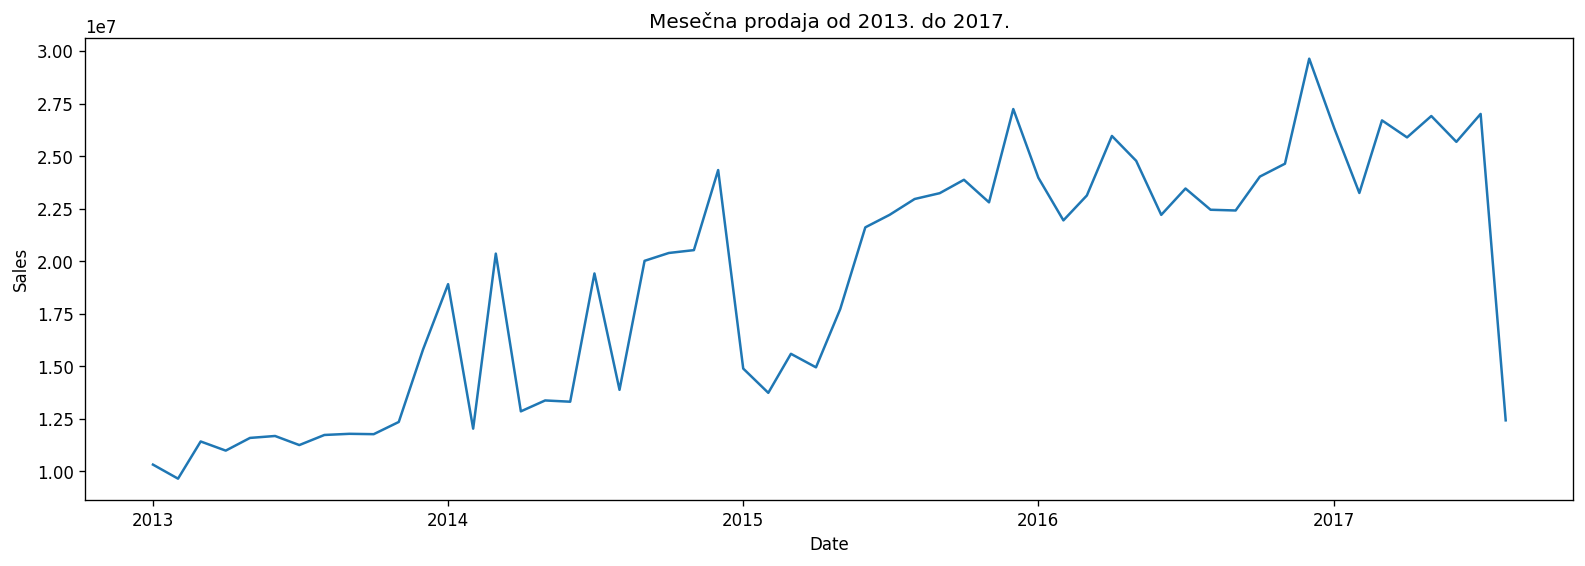

In [13]:
def plot_df(x, y, title="", xlabel="Date", ylabel="Sales"):
    plt.figure(figsize=(16, 5))
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(x=df["date"], y=df.sales, title="Mesečna prodaja od 2013. do 2017.")

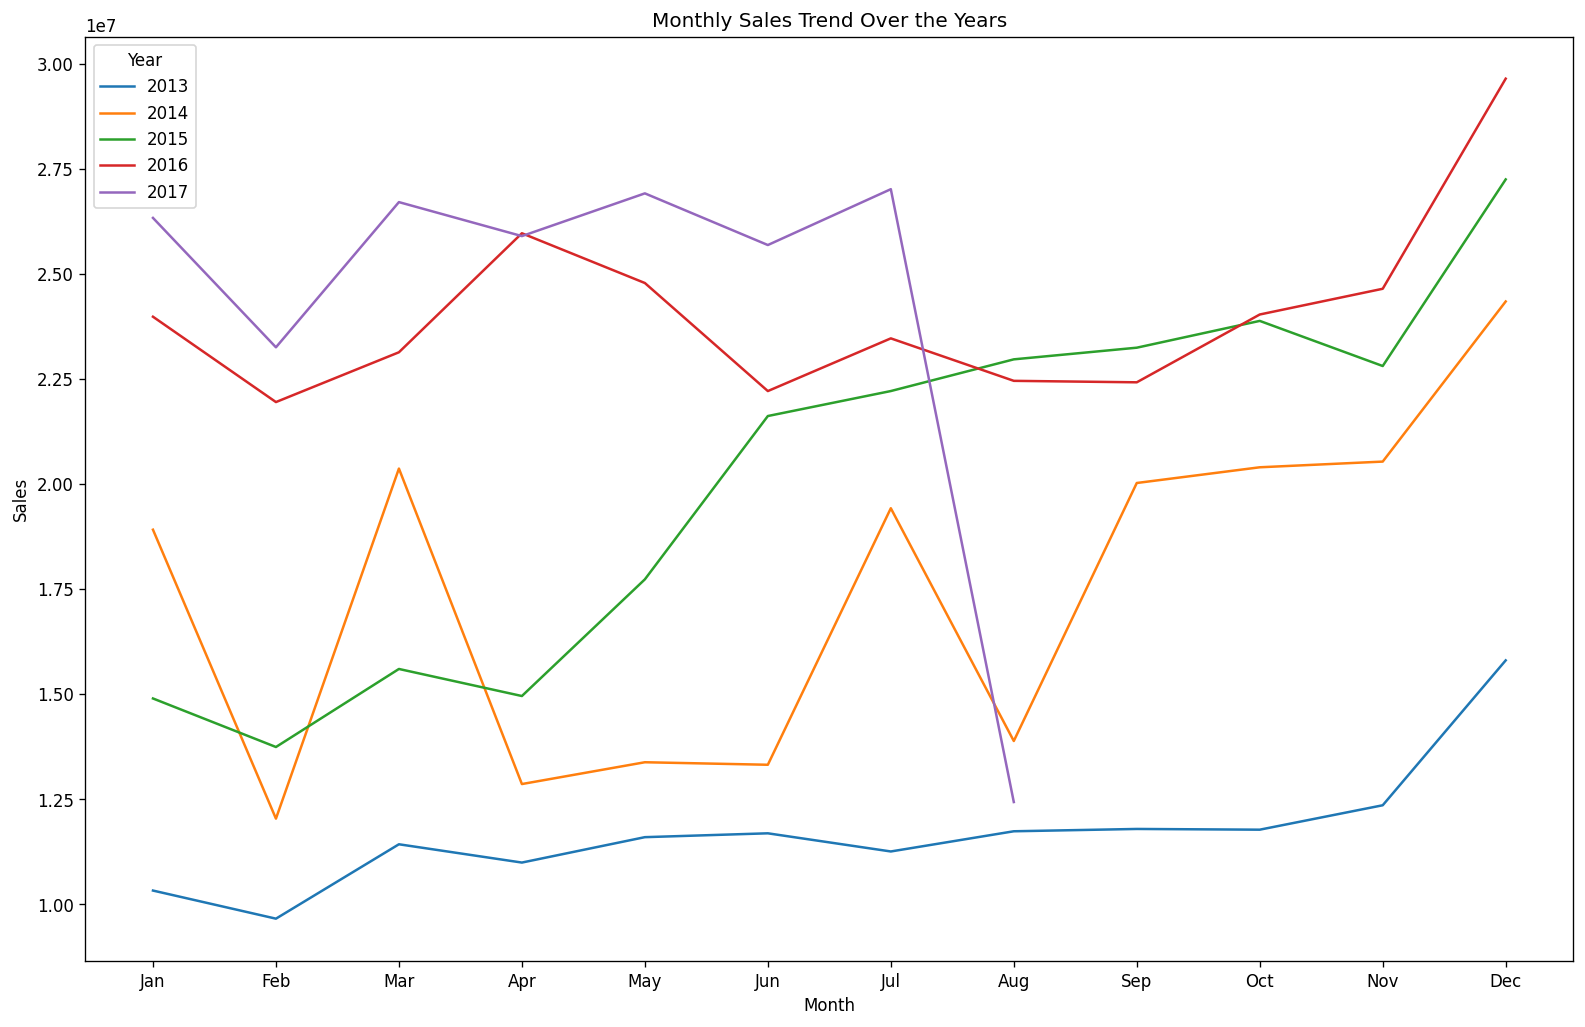

In [17]:
df["year_month"] = df["date"].dt.to_period("M")
monthly_sales = df.groupby("year_month").sales.sum().reset_index()
monthly_sales["year"] = monthly_sales["year_month"].dt.year
monthly_sales["month"] = monthly_sales["year_month"].dt.strftime("%b")

plt.figure(figsize=(16, 10))
for year in monthly_sales["year"].unique():
    subset = monthly_sales[monthly_sales["year"] == year]
    plt.plot(subset["month"], subset["sales"], label=year)
plt.title("Monthly Sales Trend Over the Years")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year")
plt.show()

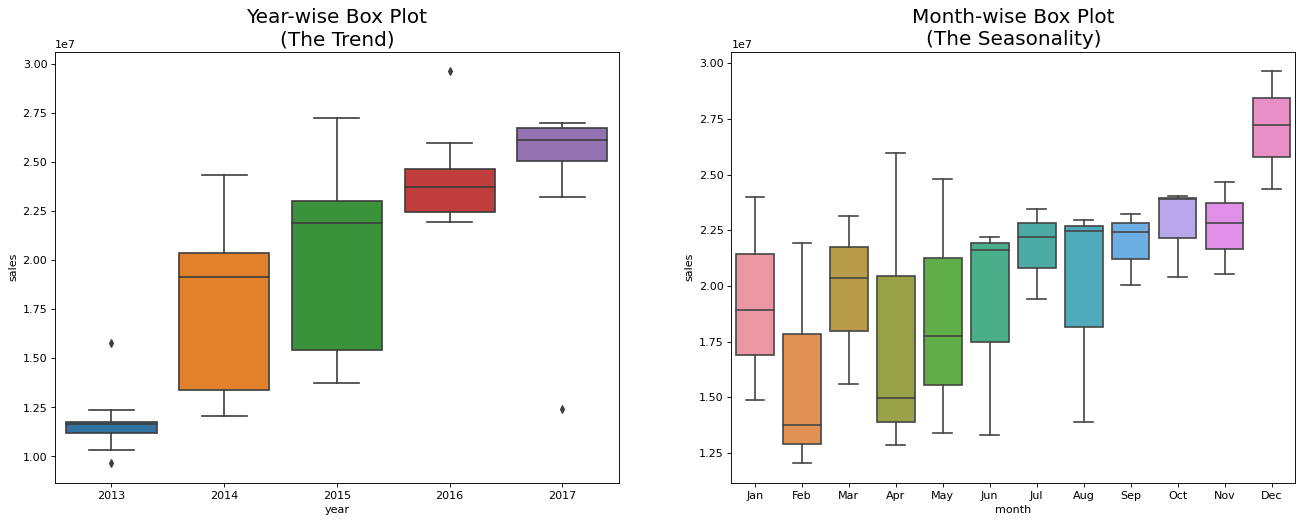

In [19]:
df["year"] = [d.year for d in df.date]
df["month"] = [d.strftime("%b") for d in df.date]
years = df["year"].unique()

fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x="year", y="sales", data=df, ax=axes[0])
sns.boxplot(x="month", y="sales", data=df.loc[~df.year.isin([2013, 2017]), :])

axes[0].set_title("Year-wise Box Plot\n(The Trend)", fontsize=18)
axes[1].set_title("Month-wise Box Plot\n(The Seasonality)", fontsize=18)
plt.show()

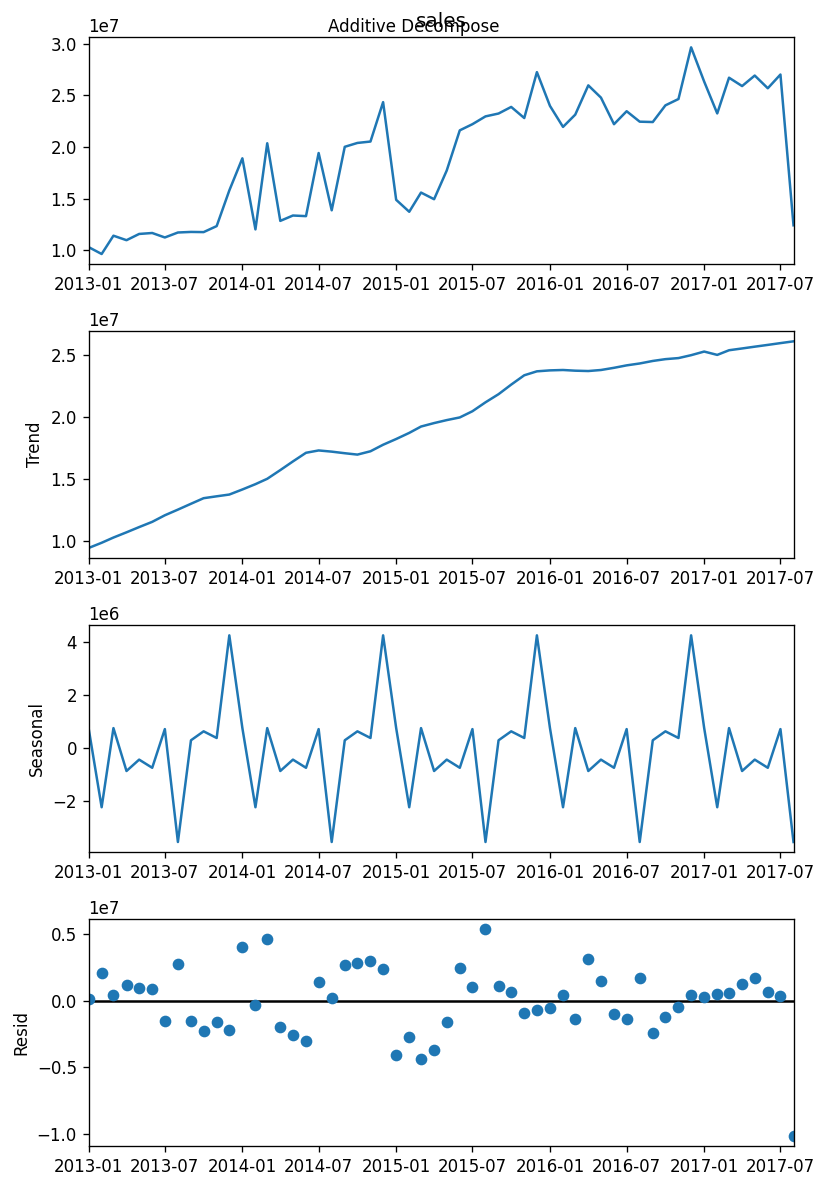

In [20]:
df.index = pd.to_datetime(df["date"], format="%Y-%m-%d")

result_add = seasonal_decompose(df["sales"], model="additive", extrapolate_trend="freq")

plt.rcParams.update({"figure.figsize": (7, 10)})
result_add.plot().suptitle("Additive Decompose", fontsize=10)
plt.show()

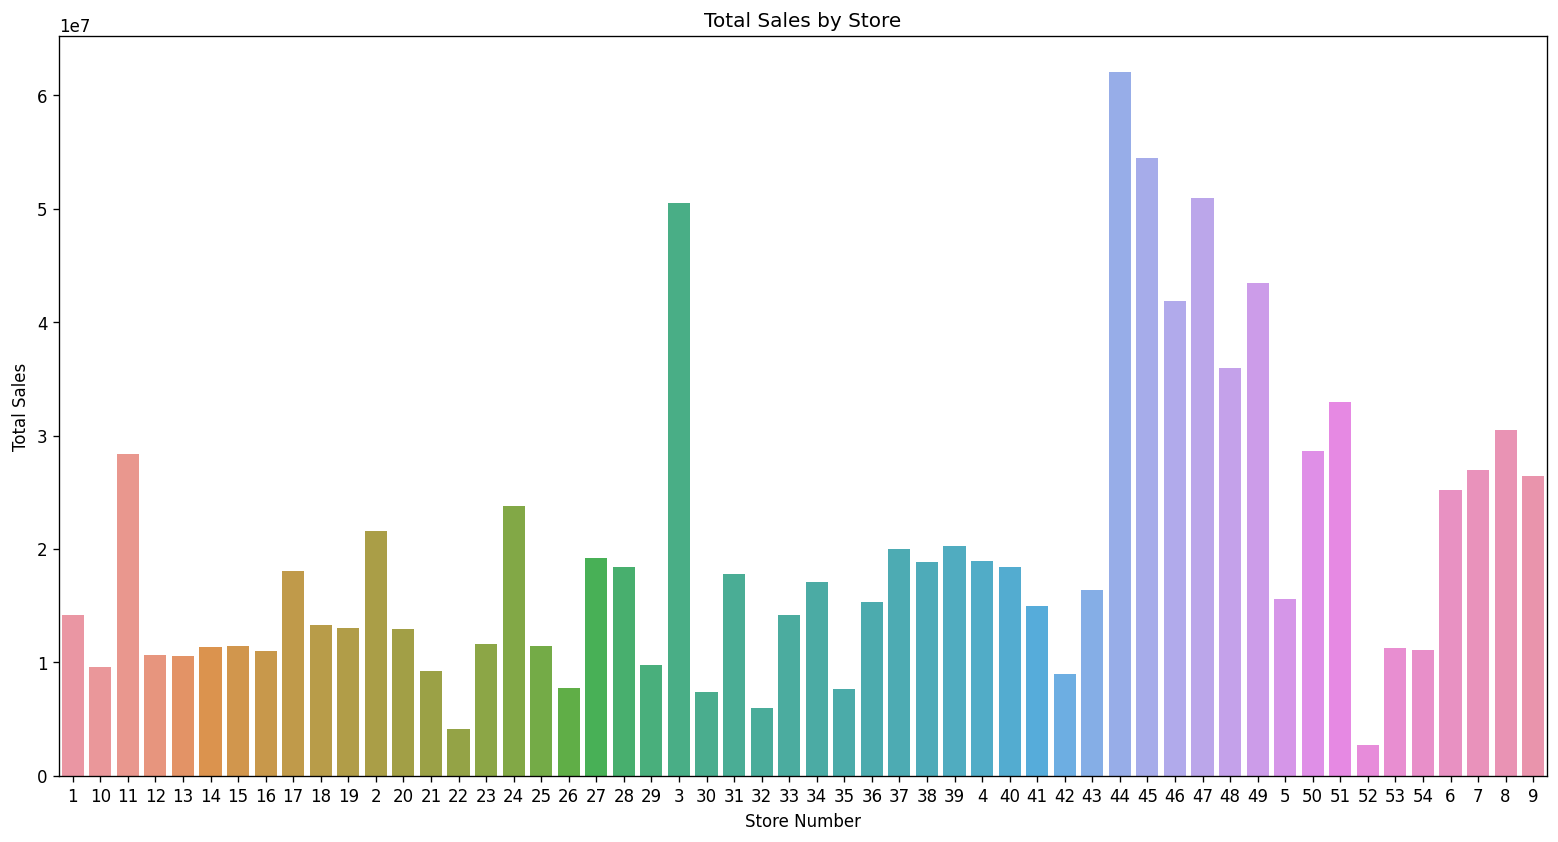

In [21]:
df_stores = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)

total_sales_per_store = df_stores.groupby("store_nbr").sales.sum().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x="store_nbr", y="sales", data=total_sales_per_store)
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

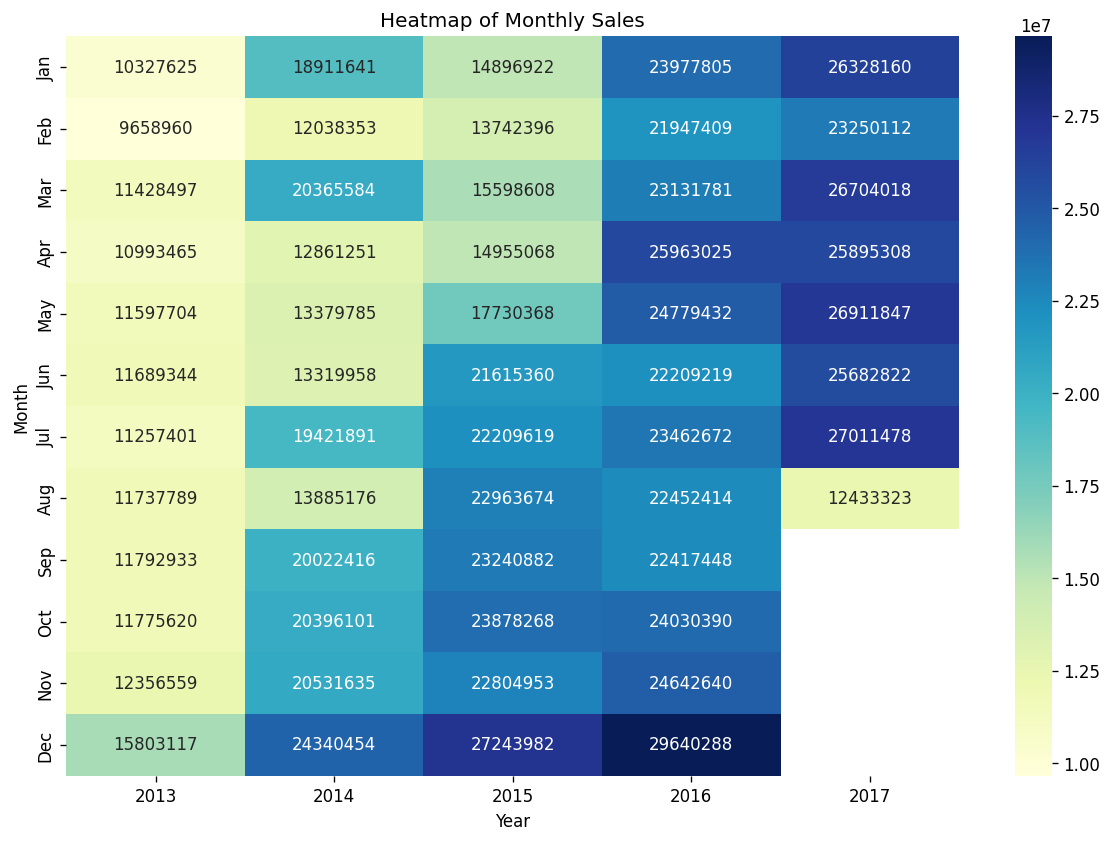

In [11]:
df = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)

df["date"] = df["date"].dt.year.astype("str") + "-" + df["date"].dt.month.astype("str") + "-01"
df["date"] = pd.to_datetime(df["date"])

df = df.groupby("date").sales.sum().reset_index()
df["year_month"] = df["date"].dt.to_period("M")

monthly_sales = df.groupby("year_month").sales.sum().reset_index()

monthly_sales["year"] = monthly_sales["year_month"].dt.year
monthly_sales["month"] = monthly_sales["year_month"].dt.strftime("%b")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_sales["month"] = pd.Categorical(
    monthly_sales["month"], categories=month_order, ordered=True
)

pivot_table = monthly_sales.pivot(index="month", columns="year", values="sales")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Monthly Sales")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()